<a href="https://colab.research.google.com/github/ayushshah04/Stock-Technical-Indicators-Using-Python.ipynb/blob/main/Stock_Technical_Indicators_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Descriptopn : create and plot multiple technical indicators
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#load the data
from google.colab import files
files.upload()

Saving AAPL.csv to AAPL (1).csv


{'AAPL.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2019-11-29,66.650002,67.000000,66.474998,66.812500,65.702515,46617600\n2019-12-02,66.817497,67.062500,65.862503,66.040001,64.942841,94487200\n2019-12-03,64.577499,64.882500,64.072502,64.862503,63.784916,114430400\n2019-12-04,65.267502,65.827499,65.169998,65.434998,64.347893,67181600\n2019-12-05,65.947502,66.472504,65.682503,66.394997,65.291946,74424400\n2019-12-06,66.870003,67.750000,66.824997,67.677498,66.553131,106075600\n2019-12-09,67.500000,67.699997,66.227501,66.730003,65.621384,128042400\n2019-12-10,67.150002,67.517502,66.464996,67.120003,66.004898,90420400\n2019-12-11,67.202499,67.775002,67.125000,67.692497,66.567886,78756800\n2019-12-12,66.945000,68.139999,66.830002,67.864998,66.737518,137310400\n2019-12-13,67.864998,68.824997,67.732498,68.787498,67.644707,133587600\n2019-12-16,69.250000,70.197502,69.245003,69.964996,68.802635,128186000\n2019-12-17,69.892502,70.442497,69.699997,70.102501,68.937851,114158400\n2019-12-18,6

In [ ]:
#store the data
df = pd.read_csv('AAPL.csv')
#set the date as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#show the data 
df

,Date,Open,High,Low,Close,Adj Close,Volume
2019-11-29,2019-11-29,66.650002,67.000000,66.474998,66.812500,65.702515,46617600
2019-12-02,2019-12-02,66.817497,67.062500,65.862503,66.040001,64.942841,94487200
2019-12-03,2019-12-03,64.577499,64.882500,64.072502,64.862503,63.784916,114430400
2019-12-04,2019-12-04,65.267502,65.827499,65.169998,65.434998,64.347893,67181600
2019-12-05,2019-12-05,65.947502,66.472504,65.682503,66.394997,65.291946,74424400
...,...,...,...,...,...,...,...
2020-11-20,2020-11-20,118.639999,118.769997,117.290001,117.339996,117.339996,73391400
2020-11-23,2020-11-23,117.180000,117.620003,113.750000,113.849998,113.849998,127959300
2020-11-24,2020-11-24,113.910004,115.849998,112.589996,115.169998,115.169998,113874200
2020-11-25,2020-11-25,115.550003,116.750000,115.169998,116.029999,116.029999,76499200


In [ ]:
#create the function to calculate the sma & ema
# create the simple moving average (SMA)
def SMA(data,period=30,column='Close'):
  return data[column].rolling(window=period).mean()

  #create the Exponential Moving Average (EMA)
def EMA(data,period=20,column='Close'):
  return data[column].ewm(span=period,adjust=False).mean()

In [ ]:
#calculate the Moving Average Convergence/Divergence (MACD)
def MACD(data,period_long=26,period_short=12,period_signal=9,column='Close'):
#calculate the Short term exonential moving average
 ShortEMA = EMA(data,period_short,column=column)
#calculate the Long term Exponential moving average 
 LongEMA = EMA(data,period_long,column = column)
#calculate the Moving average Convergence/Divergence (MACD)
 data['MACD'] = ShortEMA - LongEMA
#calculate the signal Line 
 data['Signal_Line'] = EMA(data, period_signal ,column ='MACD')
 return data

In [ ]:
#create the Function to compute the relative strength index (RSI)
def RSI(data,period=14,column='Close'):
  delta = data[column].diff(1)
  delta = delta[1:]
  up = delta.copy()
  down = delta.copy()
  up[up<0] = 0
  down[down>0]=0
  data['UP'] = up
  data['down'] = down
  AVG_Gain = SMA(data,period,column = 'UP')
  AVG_Loss = abs(SMA(data,period,column = 'down'))
  RS = AVG_Gain / AVG_Loss
  RSI = 100.0 - (100.0/(1.0 + RS))
  
  data['RSI'] = RSI
  return data


In [ ]:
#Create/add to the data set
MACD(df)
RSI(df)
df['SMA'] = SMA(df)
df['EMA'] = EMA(df)

In [ ]:
#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal_Line,UP,down,RSI,SMA,EMA
2019-11-29,2019-11-29,66.650002,67.000000,66.474998,66.812500,65.702515,46617600,0.000000,0.000000,NaN,NaN,NaN,NaN,66.812500
2019-12-02,2019-12-02,66.817497,67.062500,65.862503,66.040001,64.942841,94487200,-0.061624,-0.012325,0.000000,-0.772499,NaN,NaN,66.738929
2019-12-03,2019-12-03,64.577499,64.882500,64.072502,64.862503,63.784916,114430400,-0.203134,-0.050487,0.000000,-1.177498,NaN,NaN,66.560221
2019-12-04,2019-12-04,65.267502,65.827499,65.169998,65.434998,64.347893,67181600,-0.266019,-0.093593,0.572495,0.000000,NaN,NaN,66.453057
2019-12-05,2019-12-05,65.947502,66.472504,65.682503,66.394997,65.291946,74424400,-0.235676,-0.122010,0.959999,0.000000,NaN,NaN,66.447528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-20,2020-11-20,118.639999,118.769997,117.290001,117.339996,117.339996,73391400,0.870137,0.691934,0.000000,-1.300003,69.138000,117.014333,117.252616
2020-11-23,2020-11-23,117.180000,117.620003,113.750000,113.849998,113.849998,127959300,0.488706,0.651288,0.000000,-3.489998,57.042536,116.662667,116.928557
2020-11-24,2020-11-24,113.910004,115.849998,112.589996,115.169998,115.169998,113874200,0.289593,0.578949,1.320000,0.000000,50.523313,116.465000,116.761075
2020-11-25,2020-11-25,115.550003,116.750000,115.169998,116.029999,116.029999,76499200,0.198897,0.502939,0.860001,0.000000,41.573036,116.293000,116.691449


AttributeError: ignored

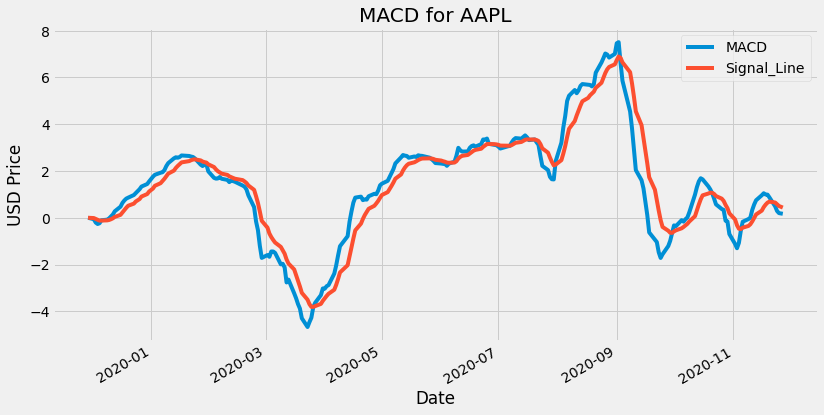

In [ ]:
#plot the chart
# create a list of the columns to Keep
column_list = ['MACD','Signal_Line']
df[column_list].plot(figsize=(12.2,6.4))
plt.title('MACD for AAPL')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.shown()

AttributeError: ignored

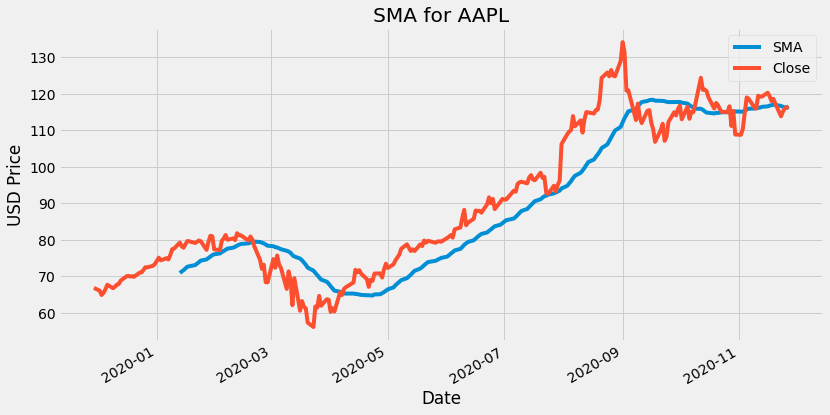

In [ ]:
#plot the chart
# create a list of the columns to Keep
column_list = ['SMA','Close']
df[column_list].plot(figsize=(12.2,6.4))
plt.title('SMA for AAPL')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.shown()

AttributeError: ignored

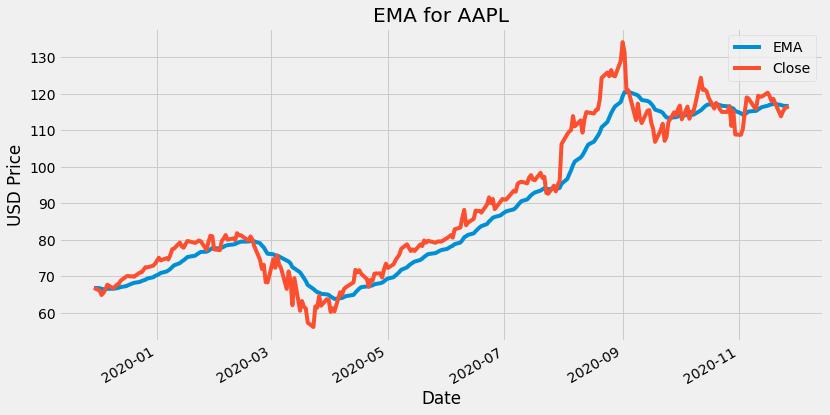

In [ ]:
#plot the chart
# create a list of the columns to Keep
column_list = ['EMA','Close']
df[column_list].plot(figsize=(12.2,6.4))
plt.title('EMA for AAPL')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.shown()

AttributeError: ignored

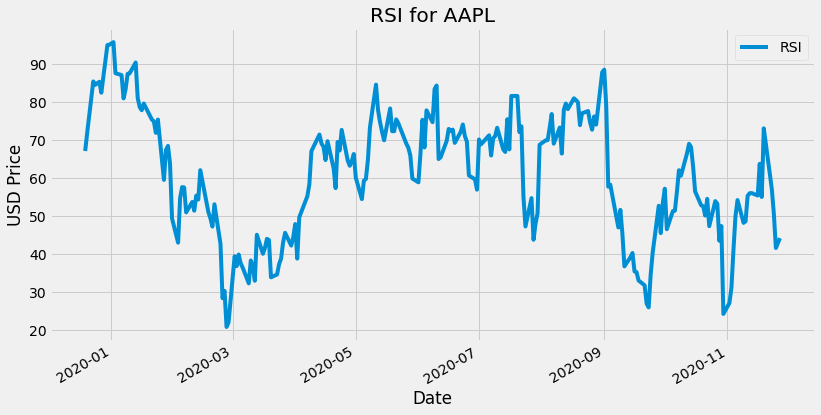

In [ ]:
#plot the chart
# create a list of the columns to Keep
column_list = ['RSI']
df[column_list].plot(figsize=(12.2,6.4))
plt.title('RSI for AAPL')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.shown()